# Python Libraries

In [1]:
!pip install yfinance


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Libralies
import statistics
from scipy import stats
from scipy.stats import sem
from scipy.stats import ttest_ind_from_stats
from scipy.stats import pearsonr
import statsmodels.api as sm
import pandas as pd
import numpy as np
import math 
from matplotlib import pyplot as plt
import warnings 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
#from mlxtend.plotting import plot_confusion_matrix
import yfinance as yf
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.spatial import distance
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
#from math import dist 
from sklearn.ensemble import RandomForestClassifier #Import Random Forest Model
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor

In [3]:
#python.exe -m install --upgrade pip

#!pip install mlxtend

In [4]:
warnings.simplefilter("ignore")

Question 1.3

In [5]:
ticker = ['MMM','AXP','AMGN','AAPL','BA','CAT','CVX','CSCO',\
           'KO','DIS','DOW','GS','HD','HON','IBM','INTC','JNJ','JPM','MCD','MRK',\
           'MSFT','NKE','PG','CRM','TRV','UNH','VZ','V','WBA','WMT']

In [6]:
Data = [yf.download(t,start="2021-08-31", end="2022-08-31")['Adj Close'] for t in ticker]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
data = pd.DataFrame(Data).T
data.columns = ticker
data

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-30,186.671402,161.754684,215.458542,152.014603,217.660004,205.459244,93.883965,56.945774,53.740185,179.979996,...,300.222473,165.945602,138.608383,264.970001,155.111328,410.228027,51.318035,229.090714,46.034698,145.377029
2021-08-31,185.310654,163.428772,216.804367,150.733902,219.500000,204.895660,92.338142,56.839836,53.864532,181.300003,...,298.531433,162.696442,138.084702,265.269989,155.374008,408.237213,51.533535,226.980423,48.041561,145.770737
2021-09-01,184.073593,161.931961,214.708725,151.408997,218.119995,202.068130,91.326691,56.859104,54.228027,183.479996,...,298.481964,162.518661,139.490906,268.320007,154.955673,409.296417,51.477322,227.990982,47.606110,145.455765
2021-09-02,185.453369,159.578384,217.217743,152.540771,220.830002,205.779877,93.235100,57.331005,54.304558,181.860001,...,297.809509,161.639709,139.597565,264.149994,155.626938,415.533661,51.805264,222.105927,49.016586,146.223495
2021-09-03,184.977585,156.870331,217.611877,153.186081,218.169998,204.409821,93.025169,57.225060,54.266293,181.000000,...,297.799652,161.264389,139.694534,267.079987,154.848663,414.700104,51.936436,223.027328,48.552742,146.902649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,139.407639,158.524857,242.817535,167.252548,163.600006,192.869476,161.937347,46.636806,63.444202,116.410004,...,275.014984,110.750969,144.792419,180.009995,167.534668,533.138489,42.828220,206.209091,36.342236,134.970001
2022-08-25,141.107727,161.613068,243.999390,169.748413,169.380005,197.558105,163.356354,46.834965,63.749790,117.459999,...,278.066376,112.550262,144.673264,173.910004,168.021881,538.216919,43.015072,209.352066,36.371887,135.869995
2022-08-26,127.645370,156.711777,239.003799,163.349014,164.529999,190.644348,162.155655,45.467667,62.211990,114.070000,...,267.336609,107.639481,141.287277,165.229996,165.894012,525.973145,42.533192,202.437515,35.581192,131.600006


In [8]:
Daily_returns=data.pct_change()
Daily_returns

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-31,-0.007290,0.010350,0.006246,-0.008425,0.008454,-0.002743,-0.016465,-0.001860,0.002314,0.007334,...,-0.005633,-0.019580,-0.003778,0.001132,0.001693,-0.004853,0.004199,-0.009212,0.043595,0.002708
2021-09-01,-0.006676,-0.009159,-0.009666,0.004479,-0.006287,-0.013800,-0.010954,0.000339,0.006748,0.012024,...,-0.000166,-0.001093,0.010184,0.011498,-0.002692,0.002595,-0.001091,0.004452,-0.009064,-0.002161
2021-09-02,0.007496,-0.014534,0.011686,0.007475,0.012424,0.018369,0.020897,0.008299,0.001411,-0.008829,...,-0.002253,-0.005408,0.000765,-0.015541,0.004332,0.015239,0.006371,-0.025813,0.029628,0.005278
2021-09-03,-0.002566,-0.016970,0.001814,0.004230,-0.012045,-0.006658,-0.002252,-0.001848,-0.000705,-0.004729,...,-0.000033,-0.002322,0.000695,0.011092,-0.005001,-0.002006,0.002532,0.004148,-0.009463,0.004645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,-0.005009,0.011441,0.000082,0.001794,0.022053,-0.015466,0.007408,-0.007171,0.001400,0.013495,...,-0.002351,0.006596,-0.004302,0.022784,0.001189,0.001232,0.001840,-0.000629,-0.017895,0.007239
2022-08-25,0.012195,0.019481,0.004867,0.014923,0.035330,0.024310,0.008763,0.004249,0.004817,0.009020,...,0.011095,0.016246,-0.000823,-0.033887,0.002908,0.009526,0.004363,0.015242,0.000816,0.006668
2022-08-26,-0.095405,-0.030327,-0.020474,-0.037699,-0.028634,-0.034996,-0.007350,-0.029194,-0.024122,-0.028861,...,-0.038587,-0.043632,-0.023404,-0.049911,-0.012664,-0.022749,-0.011203,-0.033028,-0.021739,-0.031427


In [9]:
Correlation= Daily_returns.corr()
Correlation

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
MMM,1.000000,0.402801,0.400115,0.372412,0.353495,0.488019,0.231111,0.358568,0.411009,0.369340,...,0.322645,0.398900,0.365752,0.291101,0.390594,0.339271,0.274477,0.349001,0.453275,0.124244
AXP,0.402801,1.000000,0.287036,0.540883,0.609675,0.492327,0.289080,0.428545,0.391245,0.585443,...,0.498496,0.524452,0.255268,0.467870,0.494535,0.385446,0.134359,0.648852,0.367304,0.121721
AMGN,0.400115,0.287036,1.000000,0.303465,0.120080,0.249780,0.075963,0.297517,0.405729,0.180943,...,0.252241,0.122702,0.329777,0.145809,0.321802,0.418997,0.362556,0.251562,0.405191,0.135354
AAPL,0.372412,0.540883,0.303465,1.000000,0.524454,0.321419,0.200858,0.539039,0.382103,0.592490,...,0.786324,0.637517,0.326369,0.639005,0.254910,0.485856,0.175495,0.587638,0.412378,0.264869
BA,0.353495,0.609675,0.120080,0.524454,1.000000,0.434576,0.238350,0.328128,0.229725,0.624723,...,0.398256,0.487085,0.140829,0.436078,0.258474,0.215681,0.141618,0.495074,0.377636,0.074619
CAT,0.488019,0.492327,0.249780,0.321419,0.434576,1.000000,0.609156,0.287558,0.224384,0.377282,...,0.297319,0.393361,0.027929,0.237888,0.455454,0.270003,0.204378,0.360400,0.422281,0.107481
CVX,0.231111,0.289080,0.075963,0.200858,0.238350,0.609156,1.000000,0.185945,0.127208,0.189654,...,0.149417,0.190457,-0.070950,0.162574,0.347376,0.263576,0.202780,0.158976,0.261011,0.133456
CSCO,0.358568,0.428545,0.297517,0.539039,0.328128,0.287558,0.185945,1.000000,0.481345,0.434785,...,0.506132,0.455341,0.432765,0.437704,0.383280,0.385986,0.206720,0.383239,0.339776,0.281599
KO,0.411009,0.391245,0.405729,0.382103,0.229725,0.224384,0.127208,0.481345,1.000000,0.271195,...,0.356323,0.318659,0.716026,0.234763,0.464088,0.541897,0.394244,0.372129,0.449143,0.389075
DIS,0.369340,0.585443,0.180943,0.592490,0.624723,0.377282,0.189654,0.434785,0.271195,1.000000,...,0.572754,0.594053,0.198901,0.574006,0.313498,0.276550,0.160472,0.585210,0.383996,0.177964


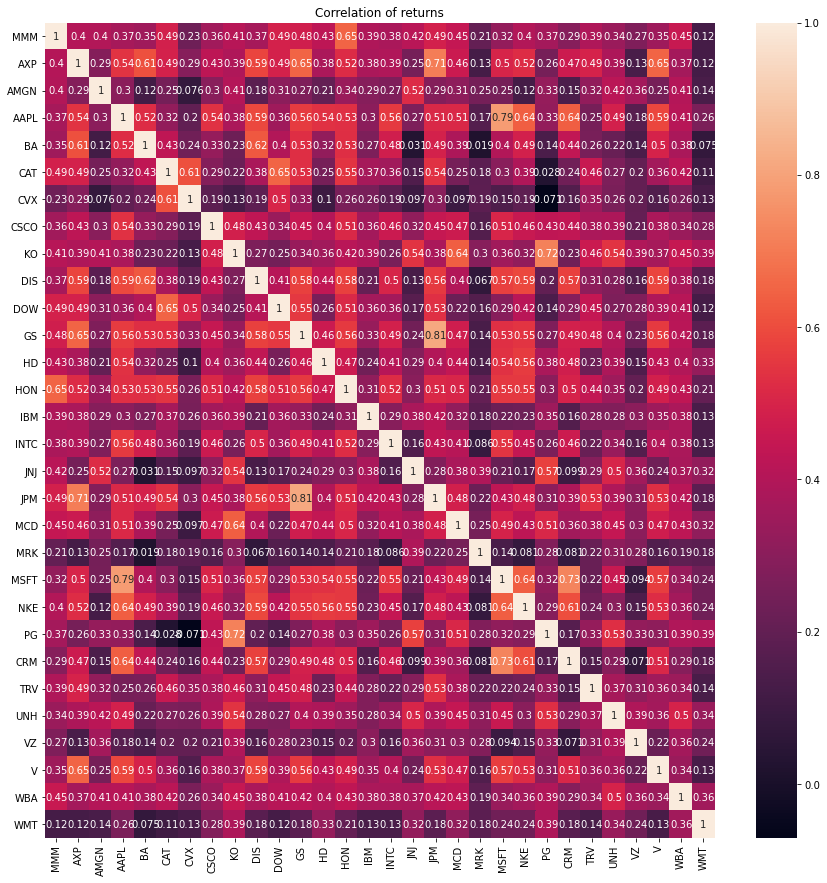

In [10]:
plt.figure(figsize=(15,15)) #size of the figure
sns.heatmap(Correlation,annot=True)
plt.title("Correlation of returns")
plt.show()

In [11]:
pca = PCA(n_components = 30)
pcanew=pca.fit_transform(Daily_returns.corr())
#pcanew

In [12]:
pr_component1=pcanew[:,0]
pr_component2=pcanew[:,1]
twocomp=pcanew[:,0:2]
#pcad = pd.DataFrame(pcanew[:,0,1])

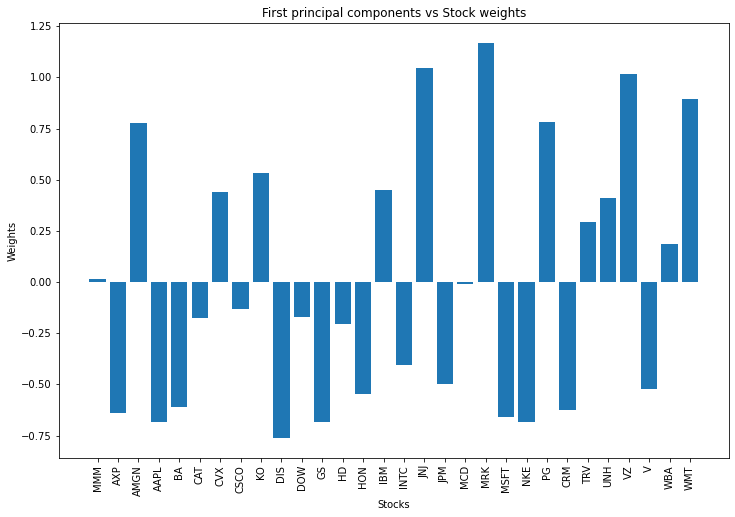

In [13]:
plt.figure(figsize=(12,8)) #size of the figure
plt.bar(ticker,pr_component1)
plt.title("First principal components vs Stock weights")
plt.xlabel("Stocks")
plt.ylabel("Weights")
plt.xticks(rotation=90);


[]

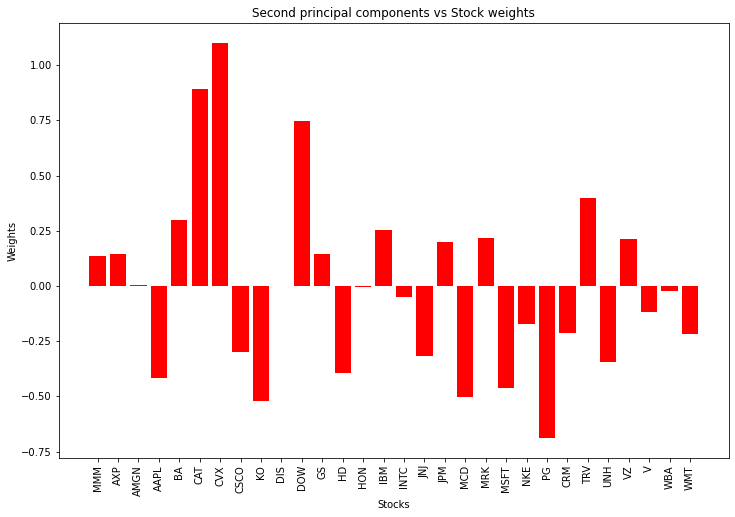

In [14]:
plt.figure(figsize=(12,8)) #size of the figure
plt.bar(ticker,pr_component2,color='r')
plt.title("Second principal components vs Stock weights")
plt.xlabel("Stocks")
plt.ylabel("Weights")
plt.xticks(rotation=90)
[]

Question 1.4

In [15]:
varianceexp=pca.explained_variance_ratio_
cumsumvar=varianceexp.cumsum()
n=1
h=[]
val=[]
for i in cumsumvar:
  if i>=0.95:
    h.append(n)
    val.append(i)
  n+=1
print(f'The number of principal components that are required to explain 95% of the variance is ',h[0])

The number of principal components that are required to explain 95% of the variance is  15


In [16]:
#pca.plot.bar()
#plt.xticks(np.arange(30),ticker);

In [17]:
# plt.bar(pca.pr_component1,pca.pr_component2)
# plt.show()

Text(0, 0.5, 'cumulative variance')

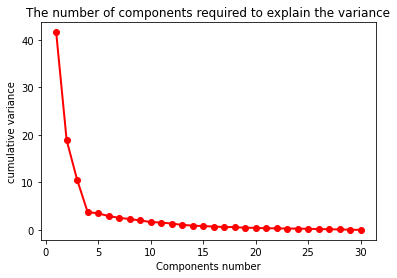

In [18]:


plt.plot(range(1, 31),varianceexp*100, 'ro-', linewidth=2)
plt.title("The number of components required to explain the variance")
plt.xlabel("Components number")
plt.ylabel("cumulative variance")

first pc is around 40 explained variance, ..........

[]

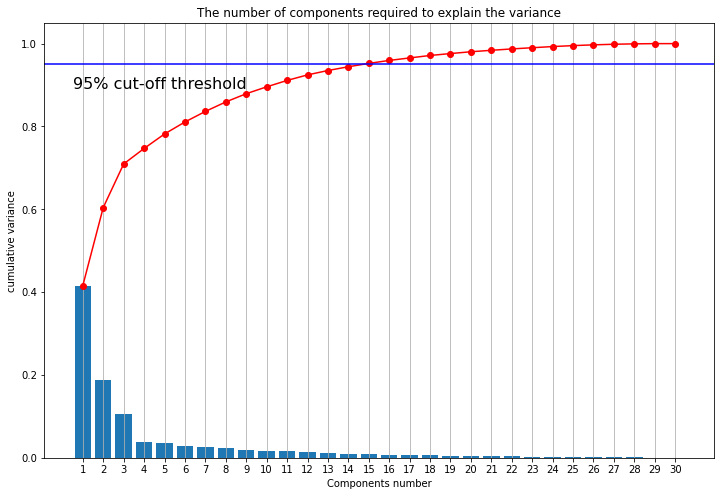

In [19]:
plt.figure(figsize=(12,8)) #size of the figure
plt.plot(range(1,31),cumsumvar,color='r',marker='o')
plt.bar(range(1,31),varianceexp)
plt.xticks(range(1,31))
plt.title("The number of components required to explain the variance")
plt.xlabel("Components number")
plt.ylabel("cumulative variance")
# specifying horizontal line type
plt.axhline(y = 0.95, color = 'b', linestyle = '-')
plt.grid(axis='x')
plt.text(0.5, 0.89, '95% cut-off threshold', fontsize=16)
#plt.scatter(h[0],val[0],color='k')
[]

Question 1.5

[]

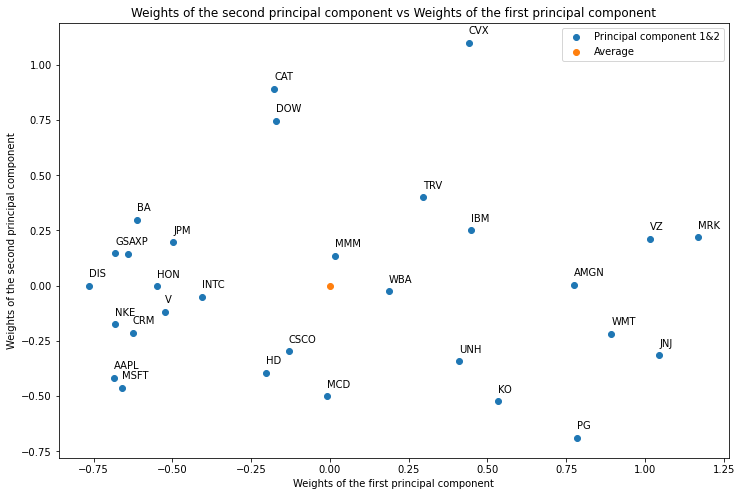

In [20]:
plt.figure(figsize=(12,8)) #size of the figure
average1=pr_component1.mean()
average2=pr_component2.mean()
plt.scatter(pr_component1,pr_component2, label='Principal component 1&2')
plt.scatter(average1,average2, label='Average')

plt.title("Weights of the second principal component vs Weights of the first principal component")
plt.xlabel("Weights of the first principal component")
plt.ylabel("Weights of the second principal component")
plt.legend()

for i in range(len(pr_component1)):
    plt.annotate(ticker[i], (pr_component1[i],pr_component2[i] + 0.04))
[]

In [21]:
def calc_distance(p1, p2): # simple function, I hope you are more comfortable
  return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2) # Pythagorean theorem

In [22]:
compdatafr=pd.DataFrame(pcanew).iloc[:,0:2]
dist=[]
A30stocks=(Daily_returns.mean()).mean()
print(f'The average of 30 stocks is: {A30stocks}')
for y in Daily_returns.mean():
    euclidean_distance = np.linalg.norm(A30stocks -y)# calculating euclidean distances
    dist.append(euclidean_distance)
di=pd.DataFrame(dist,index=ticker )
sorted_Distance=di.sort_values(by=[0],ascending=False)
sorted_Distance[:3]


The average of 30 stocks is: -0.00029673929363318745


,0
CVX,0.002577
INTC,0.001378
DIS,0.001374


####The three most distant stocks for each principal component are 
CVX	0.002653

DIS	0.001408

INTC	0.001392



Question 2.3

In [23]:
Pairwise_dist=(2*(1-Daily_returns.corr())**(1/2)) #Calculating the pairwise distance
Pairwise_dist

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
MMM,0.000000,1.545573,1.549045,1.584409,1.608111,1.431057,1.753727,1.601789,1.534915,1.588282,...,1.646031,1.550613,1.592793,1.683923,1.561289,1.625705,1.703553,1.613690,1.478817,1.871636
AXP,1.545573,0.000000,1.688744,1.355164,1.249520,1.425023,1.686321,1.511893,1.560455,1.287721,...,1.416338,1.379200,1.725957,1.458945,1.421921,1.567871,1.860796,1.185154,1.590844,1.874331
AMGN,1.549045,1.688744,0.000000,1.669173,1.876081,1.732304,1.922537,1.676285,1.541779,1.810035,...,1.729461,1.873283,1.637343,1.848449,1.647056,1.524471,1.596802,1.730246,1.542477,1.859727
AAPL,1.584409,1.355164,1.669173,0.000000,1.379196,1.647520,1.787895,1.357882,1.572129,1.276731,...,0.924502,1.204131,1.641501,1.201656,1.726372,1.434076,1.816046,1.284308,1.533131,1.714795
BA,1.608111,1.249520,1.876081,1.379196,0.000000,1.503893,1.745451,1.639356,1.755307,1.225197,...,1.551443,1.432362,1.853830,1.501895,1.722239,1.771236,1.852978,1.421163,1.577802,1.923934
CAT,1.431057,1.425023,1.732304,1.647520,1.503893,0.000000,1.250350,1.688126,1.761381,1.578249,...,1.676521,1.557741,1.971874,1.745980,1.475868,1.708797,1.783953,1.599500,1.520157,1.889464
CVX,1.753727,1.686321,1.922537,1.787895,1.745451,1.250350,0.000000,1.804500,1.868467,1.800385,...,1.844541,1.799493,2.069734,1.830220,1.615703,1.716303,1.785743,1.834148,1.719290,1.861767
CSCO,1.601789,1.511893,1.676285,1.357882,1.639356,1.688126,1.804500,0.000000,1.440354,1.503615,...,1.405515,1.476020,1.506301,1.499728,1.570630,1.567180,1.781326,1.570683,1.625083,1.695171
KO,1.534915,1.560455,1.541779,1.572129,1.755307,1.761381,1.868467,1.440354,0.000000,1.707402,...,1.604590,1.650868,1.065784,1.749556,1.464120,1.353667,1.556607,1.584767,1.484394,1.563234
DIS,1.588282,1.287721,1.810035,1.276731,1.225197,1.578249,1.800385,1.503615,1.707402,0.000000,...,1.307281,1.274280,1.790083,1.305364,1.657109,1.701117,1.832515,1.288084,1.569718,1.813324


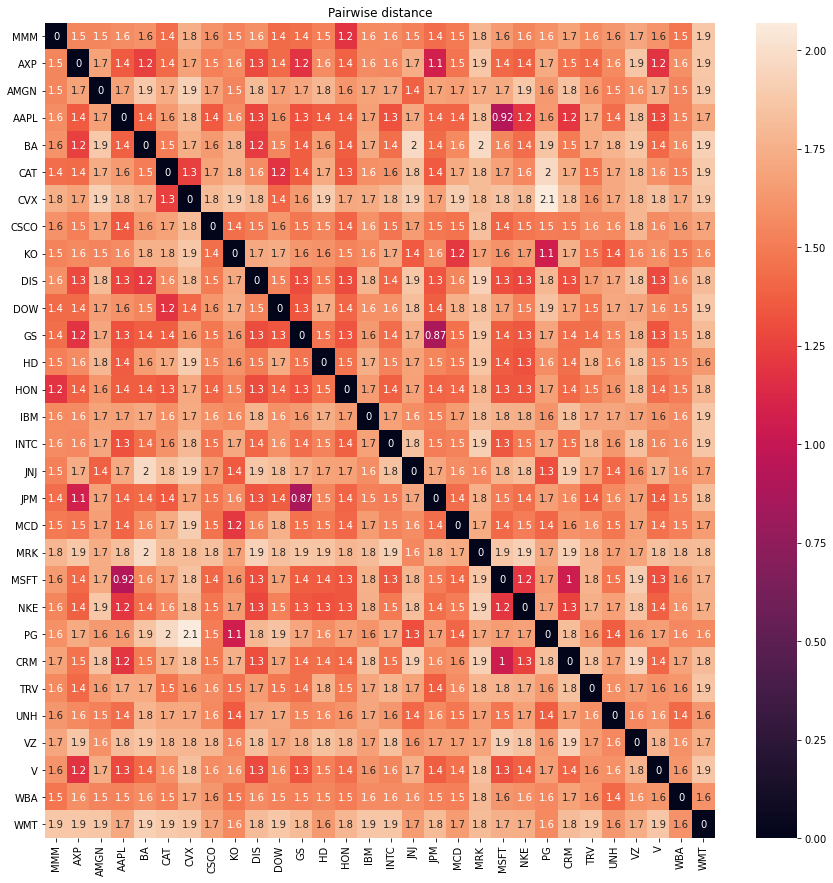

In [24]:
plt.figure(figsize=(15,15)) #size of the figure
sns.heatmap(Pairwise_dist,annot=True)
plt.title("Pairwise distance")
plt.show()

Question 2.4

No handles with labels found to put in legend.


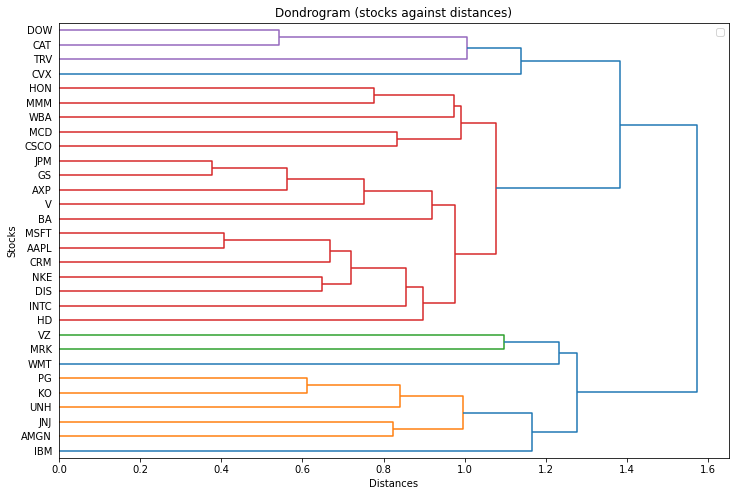

In [25]:
plt.figure(figsize=(12,8)) #size of the figure
di = hierarchy.linkage(Daily_returns.corr(), 'average')
dn = hierarchy.dendrogram(di, orientation= 'right',labels=ticker)
plt.title("Dondrogram (stocks against distances)")
plt.xlabel("Distances")
plt.ylabel("Stocks")
plt.legend();

stocks with same color, have similarities...........

Question 2.5

In [26]:
dataframe=pd.DataFrame(twocomp,index=ticker)
dataframe

,0,1
MMM,0.015196,0.134324
AXP,-0.639045,0.143889
AMGN,0.774961,0.004451
AAPL,-0.684615,-0.418193
BA,-0.610506,0.299084
CAT,-0.176194,0.892216
CVX,0.441284,1.100215
CSCO,-0.130229,-0.297633
KO,0.534276,-0.523082
DIS,-0.763070,0.000692


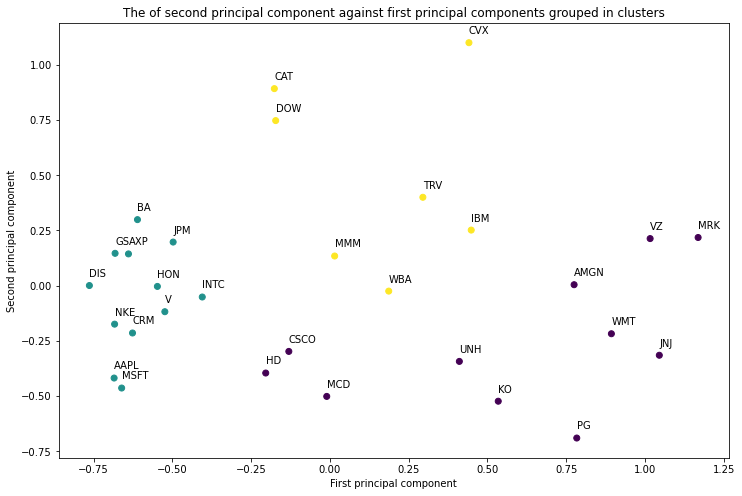

In [27]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit_predict(dataframe)
plt.figure(figsize=(12,8)) #size of the figure
plt.scatter(dataframe[0],dataframe[1],cmap='viridis', c=clustering.labels_)

plt.title("The of second principal component against first principal components grouped in clusters")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


for i in range(len(dataframe[0])):
    plt.annotate(ticker[i], (dataframe[0][i],dataframe[1][i] + 0.04))
    

Question 3.4

In [28]:
titanic_Data=pd.read_csv("titanic3.csv") #Reading Titanic dataset
titanic_Data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [29]:
selected_data=titanic_Data[['pclass','sex','age']] #extract pclass, sex, and age columns 
selected_data

,pclass,sex,age
0,1,female,29.00
1,1,male,0.92
2,1,female,2.00
3,1,male,30.00
4,1,female,25.00
...,...,...,...
1304,3,female,14.50
1305,3,female,NaN
1306,3,male,26.50
1307,3,male,27.00


In [30]:

lab= LabelEncoder()

selected_data['sex'] = lab.fit_transform(selected_data['sex'])# transform categorical feature(sex) to numerical 
selected_data

,pclass,sex,age
0,1,0,29.00
1,1,1,0.92
2,1,0,2.00
3,1,1,30.00
4,1,0,25.00
...,...,...,...
1304,3,0,14.50
1305,3,0,NaN
1306,3,1,26.50
1307,3,1,27.00


In [31]:
selected_data['age'] = selected_data['age'].fillna(selected_data['age'].mean()) #impute missing values using mean
selected_data

,pclass,sex,age
0,1,0,29.000000
1,1,1,0.920000
2,1,0,2.000000
3,1,1,30.000000
4,1,0,25.000000
...,...,...,...
1304,3,0,14.500000
1305,3,0,29.881138
1306,3,1,26.500000
1307,3,1,27.000000


In [32]:
Y_titanic=titanic_Data['survived']
Y_titanic

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [33]:
from scipy.stats.distributions import rdist
L_Accuracy=[]
for i in range(1,100):
  #Create a Gaussian Classifier
  classf=RandomForestClassifier(n_estimators=i)

  #Train the model using the training sets y_pred=clf.predict(X_test)
  classf.fit(selected_data,Y_titanic)

  y_pred=classf.predict(selected_data)
  MSE=mean_squared_error(Y_titanic,y_pred)
  L_Accuracy.append(1-MSE)


The optimal number of trees is:24


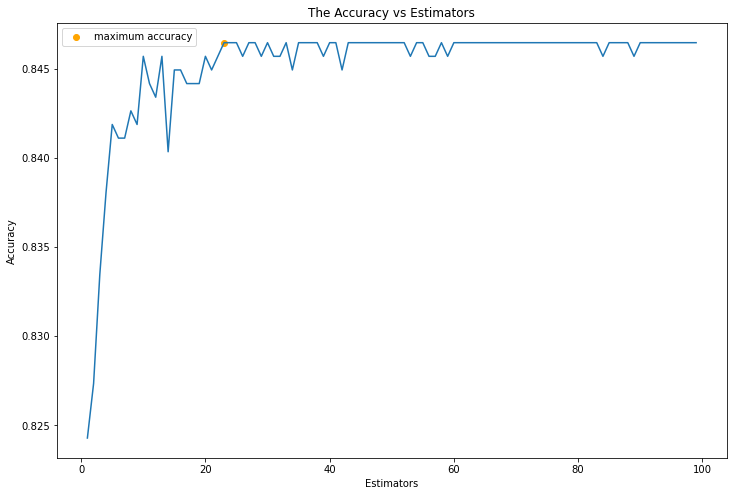

In [34]:
plt.figure(figsize=(12,8)) #size of the figure
plt.plot(range(1,100),L_Accuracy)
max_accuracy=max(L_Accuracy)
plt.title("The Accuracy vs Estimators")
plt.xlabel("Estimators")
plt.ylabel("Accuracy")

t=range(1,100)[np.argmax(L_Accuracy)]
plt.scatter(t,max_accuracy, label='maximum accuracy', color='orange')
plt.legend()

print(f'The optimal number of trees is:{t+1}')

Question 3.5

In [35]:

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(selected_data,Y_titanic, random_state=0,test_size=0.2)

In [36]:
selected_data

,pclass,sex,age
0,1,0,29.000000
1,1,1,0.920000
2,1,0,2.000000
3,1,1,30.000000
4,1,0,25.000000
...,...,...,...
1304,3,0,14.500000
1305,3,0,29.881138
1306,3,1,26.500000
1307,3,1,27.000000


Random Forest Model

In [37]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train,y_train, cv=5, method="predict_proba")
y_probas_forest = y_probas_forest[:,-1] # Use probability for positive class as score
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_probas_forest)


Decision Tree 

In [39]:
DecisionTree=DecisionTreeClassifier()
y_probas_DT = cross_val_predict(DecisionTree, X_train,y_train, cv=5, method="predict_proba")
y_probas_DT = y_probas_DT[:,-1] # Use probability for positive class as score
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_train, y_probas_DT)

KNN model

In [41]:
KNN_model11=KNeighborsClassifier()
y_probas_KNN = cross_val_predict(KNN_model11, X_train,y_train, cv=5, method="predict_proba")
y_probas_KNN = y_probas_KNN[:,-1] # Use probability for positive class as score
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_train, y_probas_KNN)

Logistic Model

In [42]:
logistic_reg1=LogisticRegression()
y_probas_log = cross_val_predict(logistic_reg1, X_train,y_train, cv=5, method="predict_proba")
y_probas_log = y_probas_log[:,-1] # Use probability for positive class as score
fpr_log, tpr_log, thresholds_log = roc_curve(y_train, y_probas_log)

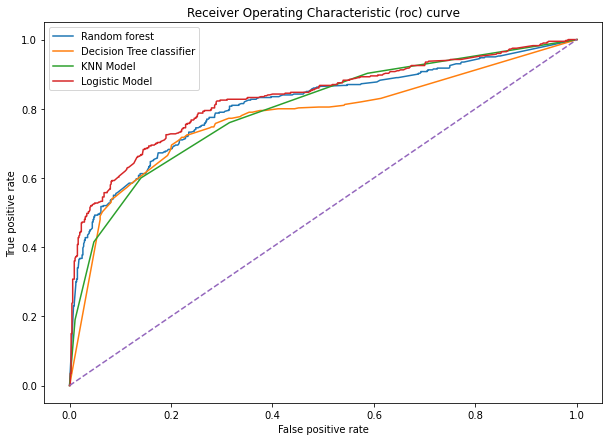

In [43]:
plt.figure(figsize=(10,7)) #size of the figure
plt.plot(fpr_forest,tpr_forest,label='Random forest')
plt.plot(fpr_DT, tpr_DT,label='Decision Tree classifier')
plt.plot(fpr_KNN, tpr_KNN,label='KNN Model')
plt.plot(fpr_log, tpr_log,label='Logistic Model')
plt.title("Receiver Operating Characteristic (roc) curve")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.show()

In [44]:
print("logistic model: {:.4f}".format(roc_auc_score(y_train,y_probas_log)))
print("RandomForest : {:.2f}".format(roc_auc_score(y_train,y_probas_forest)))
print("KNN model : {:.2f}".format(roc_auc_score(y_train,y_probas_KNN)))
print("decision tree : {:.4f}".format(roc_auc_score(y_train,y_probas_DT )))

logistic model: 0.8306
RandomForest : 0.81
KNN model : 0.80
decision tree : 0.7750


According to the results I got from the above calculations, the best model is 
Logistic madel with 0.8306 (area under the curve)

Question 4.2

In [45]:
red_wine=pd.read_csv("winequality-red.csv", delimiter=";") #Reading winequality red dataset
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [46]:
x=red_wine.drop('quality',axis=1)
y=red_wine['quality']

In [84]:
L_Accuracy2=[]
for i in range(2,100):

  classf2=RandomForestRegressor(max_leaf_nodes=i)   #Create a Gaussian Classifier


  classf2.fit(x,y)   #Train the model using the training sets y_pred=clf.predict(X_test)

  y_pred2=classf2.predict(x)
  MSE2=mean_squared_error(y,y_pred2)
  L_Accuracy2.append(MSE2)

In [90]:
t2=range(2,100)[np.argmin(L_Accuracy2)]

print(f'The optimal number of leaves is:{t2}')

The optimal number of leaves is:99


Question 4.3

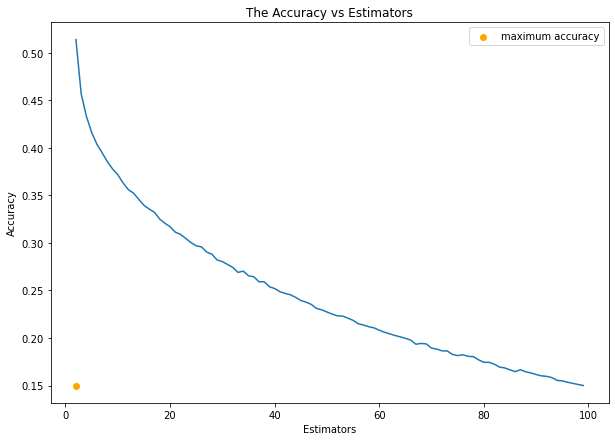

In [86]:
plt.figure(figsize=(10,7)) #size of the figure
plt.plot(range(2,100),L_Accuracy2)
plt.title("The Accuracy vs Estimators")
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
max_accuracy2=min(L_Accuracy2)
plt.scatter(t2,max_accuracy2, label='maximum accuracy', color='orange')
plt.legend()


In [89]:
L_Accuracy1=[]
for i in range(1,100):

  classf1=RandomForestRegressor(n_estimators=i)   #Create a Gaussian Classifier


  classf1.fit(x,y)   #Train the model using the training sets y_pred=clf.predict(X_test)

  y_pred1=classf1.predict(x)
  MSE1=mean_squared_error(y,y_pred1)
  L_Accuracy1.append(MSE1)
  t1=range(1,100)[np.argmin(L_Accuracy1)]

print(f'The optimal number of trees is:{t1}')

The optimal number of trees is:93


Text(0, 0.5, 'Accuracy')

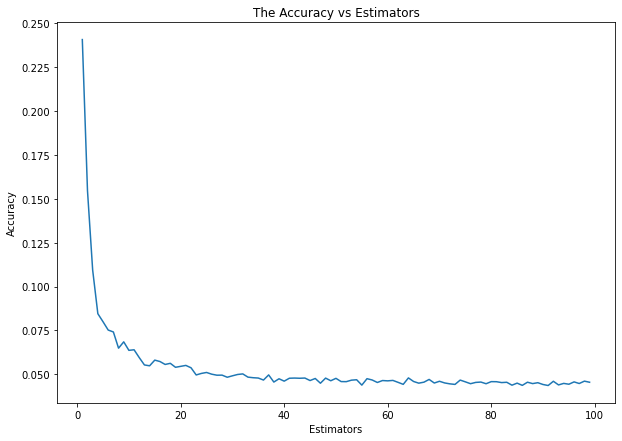

In [88]:
plt.figure(figsize=(10,7)) #size of the figure
plt.plot(range(1,100),L_Accuracy1)
plt.title("The Accuracy vs Estimators")
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
#max_accuracy2=max(L_Accuracy2)
#plt.scatter(t2,max_accuracy2, label='maximum accuracy', color='orange')
#plt.legend()

Question 4.4

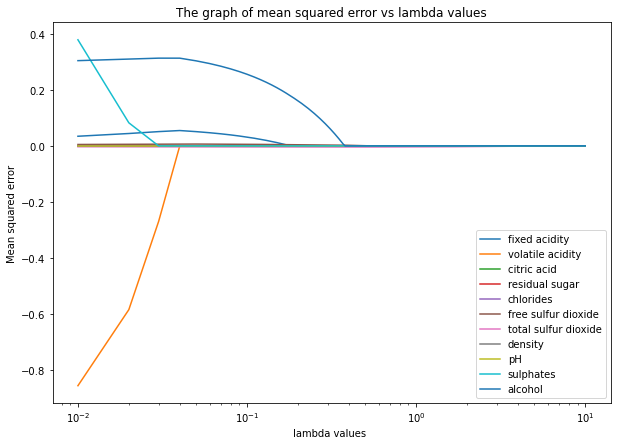

In [55]:
l1=[]
l1e=[]
list_of_maxdepth= np.arange(0.01, 10, 0.01)
for i in list_of_maxdepth:  
    LM = Lasso(alpha=i) #creating 
    LM = LM.fit(x,y) # train lASSO
    ScoresL = abs(cross_val_score(LM,x,y, cv = 10, scoring='neg_mean_squared_error').mean())
    l1.append(ScoresL)
    coef=LM.coef_
    l1e.append(coef)
plt.figure(figsize=(10,7)) # size of the figure
plt.xlabel("lambda values ")
plt.ylabel("Mean squared error")
plt.title("The graph of mean squared error vs lambda values")
plt.semilogx(list_of_maxdepth,l1e)
plt.legend(x.columns)
plt.show()

In [56]:
LassoM = Lasso(alpha=0.01) #creating 
LassoM = LassoM.fit(x,y) #train lASSO
coef1=LassoM.coef_
param=LassoM.feature_names_in_
listCoef=list(zip(param, coef1))
listCoef

[('fixed acidity', 0.03447914030187799),
 ('volatile acidity', -0.8564562880418891),
 ('citric acid', 0.0),
 ('residual sugar', 0.0),
 ('chlorides', -0.0),
 ('free sulfur dioxide', 0.005089901210329606),
 ('total sulfur dioxide', -0.0031077512882979694),
 ('density', -0.0),
 ('pH', -0.0),
 ('sulphates', 0.37903426677244856),
 ('alcohol', 0.304490276505546)]

In [57]:
classf2=RandomForestRegressor(n_estimators=32,max_leaf_nodes=318)   #Create a Gaussian Classifier
classf2.fit(x,y)   #Train the model using the training sets y_pred=clf.predict(X_test)
Parameters_w=classf2.feature_importances_


In [58]:
Parameters_w =pd.DataFrame(Parameters_w,index=x.columns)
Parameters_ww=Parameters_w.sort_values(by =0)

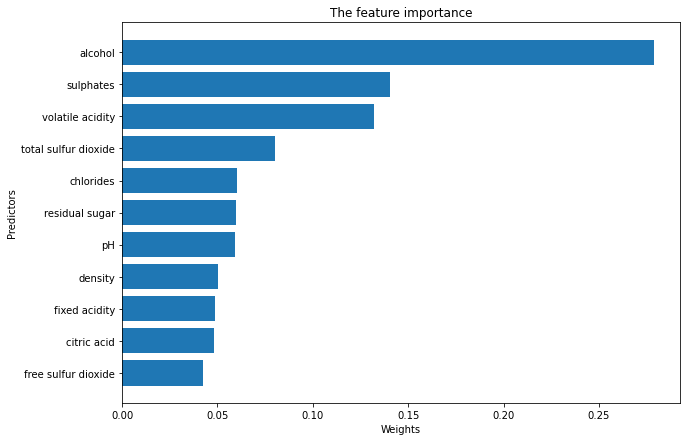

In [69]:
plt.figure(figsize=(10,7)) # size of the figure
plt.barh(Parameters_ww.index,Parameters_ww[0])
plt.xlabel("Weights")
plt.ylabel("Predictors")
plt.title("The feature importance")
plt.show()

In [79]:
red_wine1 = red_wine.drop('quality',axis=1).mean()


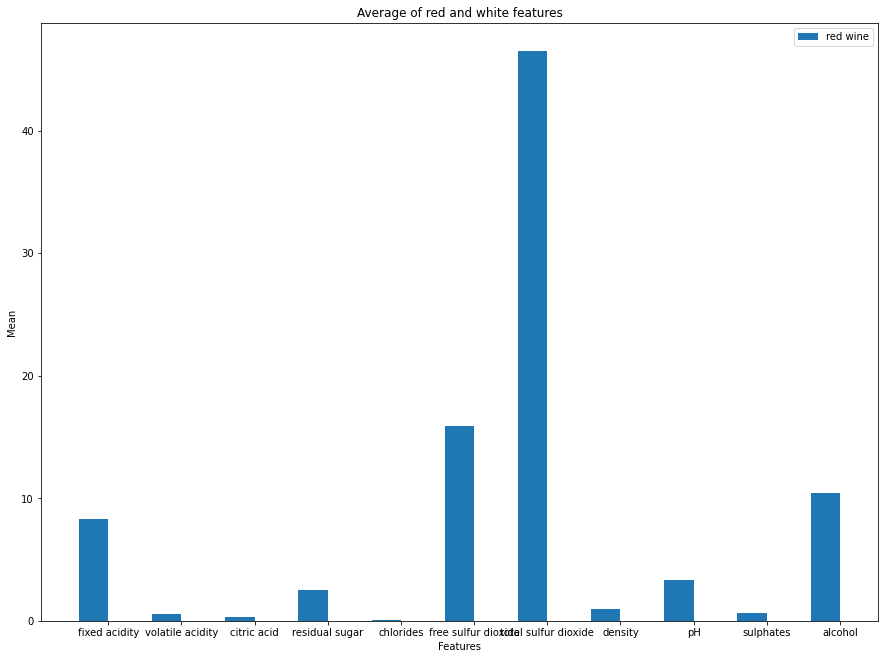

In [83]:
plt.figure(figsize=(15,11)) # size of the figure
X =red_wine1.index
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, red_wine1 , 0.4, label = 'red wine')
#plt.bar(X_axis + 0.2, white_wine, 0.4, label = 'white wine')
plt.xticks(X_axis, X)
plt.xlabel("Features")
plt.ylabel("Mean")
plt.title("Average of red and white features")
plt.legend()
plt.show()

In [60]:
Cor=x.corrwith(y)

<BarContainer object of 11 artists>

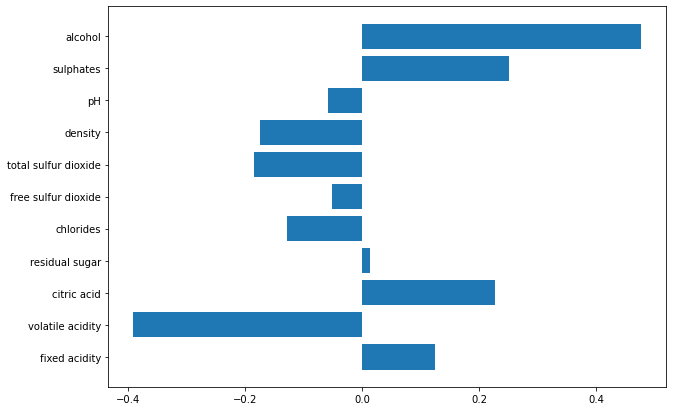

In [70]:
plt.figure(figsize=(10,7)) # size of the figure
plt.barh(x.columns,Cor)

select best predictor

Question 4.5

In [62]:
S_predict=red_wine[['fixed acidity', 'volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']]
S_predict

,fixed acidity,volatile acidity,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.700,11.0,34.0,0.56,9.4
1,7.8,0.880,25.0,67.0,0.68,9.8
2,7.8,0.760,15.0,54.0,0.65,9.8
3,11.2,0.280,17.0,60.0,0.58,9.8
4,7.4,0.700,11.0,34.0,0.56,9.4
...,...,...,...,...,...,...
1594,6.2,0.600,32.0,44.0,0.58,10.5
1595,5.9,0.550,39.0,51.0,0.76,11.2
1596,6.3,0.510,29.0,40.0,0.75,11.0
1597,5.9,0.645,32.0,44.0,0.71,10.2


In [64]:
nghbr2 = KNeighborsRegressor(n_neighbors=18)
nghbr2=nghbr2.fit(S_predict,y)
ScoresList1 = abs(cross_val_score(nghbr2, S_predict,y, cv = 10, scoring='neg_mean_squared_error').mean())
print(f'The mean squared error(MSE) for K NeighborsRegressor is: {ScoresList1}')

The mean squared error(MSE) for K NeighborsRegressor is: 0.5717637481559127


In [65]:
mdl = LinearRegression().fit(S_predict, y) # Linear Regression Model
ypredicted=mdl.predict(S_predict)
print(f'{ypredicted}')

[5.06333701 5.03270192 5.14300699 ... 5.91817931 5.49112395 6.02105912]


In [71]:
print(f'The MSE of Linear Regression Model is:{mean_squared_error(y, ypredicted)}')

The MSE of Linear Regression Model is:0.4252352692407322


In [67]:
forest_clf = RandomForestClassifier(random_state=42, max_leaf_nodes=318, n_estimators=86).fit(S_predict, y)
ypredicted1=forest_clf.predict(S_predict)
print(f'{ypredicted1}')
print(f'The MSE of Random forest Model is:{mean_squared_error(y, ypredicted1)}')


[5 5 5 ... 6 5 6]
The MSE of Random forest Model is:0.014383989993746092


The best model is the random forest model because it has low MSE of 0.014383989993746092